In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import os
import json

import matplotlib.pyplot as plt
%matplotlib inline

cwd = os.getcwd()

dir_as_list = cwd.split('/')
base_path=''
go = True
i=0
while go:
    base_path= base_path+dir_as_list[i]+'/'
    if dir_as_list[i]=='research':
        go = False
    i=i+1
    
graph_rel_path = "sample-graphs/sourcecred_sourcecred.json"
infra_rel_path = "infra"

graph_abs_file_path = os.path.abspath(os.path.join(base_path, graph_rel_path))
infra_abs_path = os.path.abspath(os.path.join(base_path, infra_rel_path))

os. chdir(infra_abs_path)
import page_ranker as pr
import import_graph as ig
import inspect_subgraph as isg
os. chdir(cwd)

In [2]:
with open(graph_abs_file_path) as json_file:  
    data = json.load(json_file)

In [3]:
G = ig.json_to_graph(data)

In [4]:
iterations = 20


alpha = 0
seed = {n:1/len(G.nodes) for n in G.nodes}
self_loop_wt = 1/1000


In [5]:
r, df, g = pr.pageRanker(G,
                         alpha,
                         iterations,
                         seed=seed,
                         initial_value = seed,
                         lazy=False,
                         self_loop_wt=self_loop_wt)

(array([2.000e+00, 2.000e+00, 1.000e+00, 6.500e+01, 2.168e+03, 1.725e+03,
        9.960e+02, 5.630e+02, 5.330e+02, 2.100e+01, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00]),
 array([-6.63145206, -6.23078144, -5.83011081, -5.42944019, -5.02876957,
        -4.62809894, -4.22742832, -3.8267577 , -3.42608707, -3.02541645,
        -2.62474583, -2.2240752 , -1.82340458, -1.42273396, -1.02206333,
        -0.62139271]),
 <a list of 15 Patch objects>)

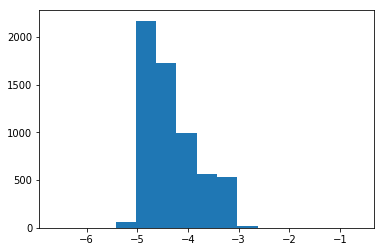

In [6]:
plt.hist(np.log10(r), bins = 15)

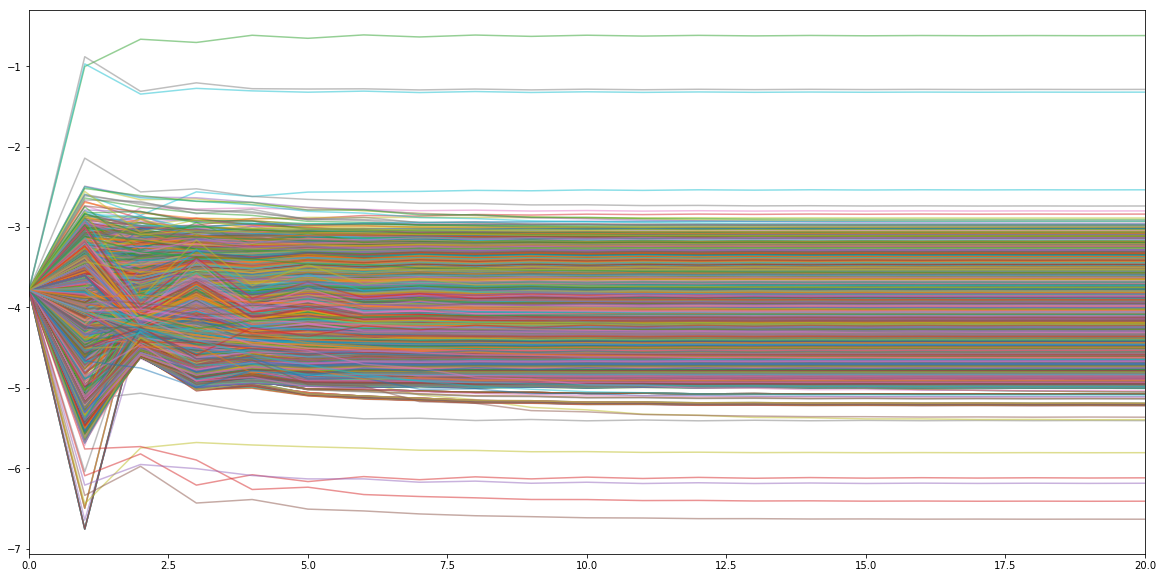

In [7]:
df.apply(np.log10).plot(legend=False, figsize=(20,10),alpha=.5)

In [8]:
top25 = list(df.T.reset_index().sort_values(iterations).tail(25).index)

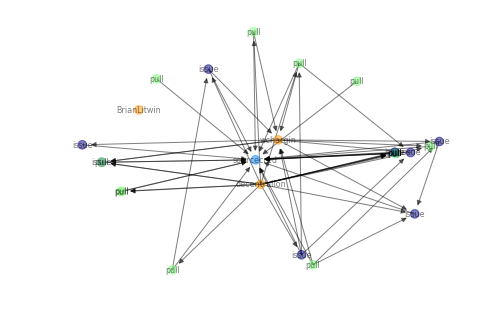

In [9]:
isg.inspectSubGraph(G, top25, expand=False, verbose=False, label=True,pos = "kk")

In [10]:
df.sum(axis=1)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
dtype: float64

(array([8.000e+00, 1.476e+03, 2.801e+03, 1.634e+03, 1.530e+02, 4.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([-0.30016227,  0.07160218,  0.44336663,  0.81513108,  1.18689553,
         1.55865998,  1.93042443,  2.30218889,  2.67395334,  3.04571779,
         3.41748224]),
 <a list of 10 Patch objects>)

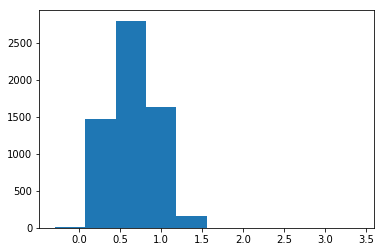

In [11]:
plt.hist([np.log10(v) for v in list(nx.get_node_attributes(G,'total_wt').values())])

In [12]:
r

array([1.07522473e-04, 1.14446050e-04, 1.06335292e-04, ...,
       5.12636261e-02, 8.73427474e-04, 8.19120005e-06])